In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

#plotting
plt.rcParams.update({'font.size': 16})

**Exercise 4.1**

In [2]:
def likelihood(lamb):
    return (lamb**n)*np.exp(-lamb*n*xbar)

In [3]:
def loglike(lamb):
    return n*(np.log(lamb)-lamb*xbar)

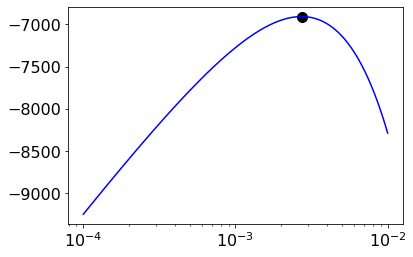

In [4]:
n = 1000
xbar = 368.15
lambs = np.linspace(1e-4,1e-2,1000)
mle = 1/xbar


plt.plot(lambs,loglike(lambs),'b')
plt.scatter(mle,loglike(mle),color='k',s=100)
plt.xscale('log')

**Exercise 4.2**

In [5]:
1/xbar

0.0027162841233192994

In [6]:
from scipy.stats import gamma

def posterior(lamb, k, theta):
    khat = n + k
    thetahat = (n*xbar + 1/theta)**-1
    return gamma.pdf(lamb, a=khat, scale=thetahat)

In [7]:
lambs = np.linspace(0.002,0.0035,1000)

postdist = posterior(lambs, 1e-4, 1000)
norm = np.sum(posterior(lambs, 1e-4, 1000))
postdist = postdist/norm
np.sum(postdist)

1.0

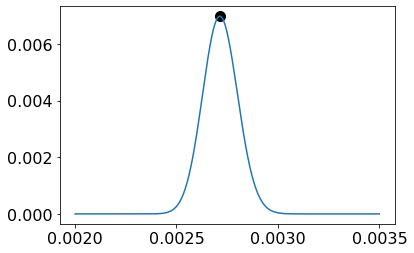

In [8]:
# posterior distribution
plt.plot(lambs,postdist)
plt.scatter(mle,posterior(mle, 1e-4, 1000)/norm,color='k',s=100)

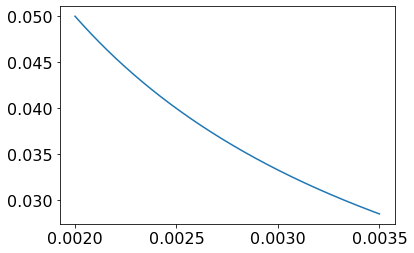

In [9]:
# prior distribution
priordist = gamma.pdf(lambs,a=1e-4,scale=1000)/1
plt.plot(lambs,priordist)

In [10]:
from scipy.stats import bayes_mvs

bayes_mvs(postdist, alpha=0.95)

(Mean(statistic=1e-03, minmax=(0.0008768733134226689, 0.0011231266865773311)),
 Variance(statistic=3.944805136933289e-06, minmax=(3.6132452448325747e-06, 4.306324781024153e-06)),
 Std_dev(statistic=0.0019856553819004026, minmax=(0.0019008538199537003, 0.0020751686150826763)))

In [11]:
np.sum(postdist)

1.0

In [12]:
start = np.argmax(postdist)
central_cred = [start]
i = 1

while np.sum(postdist[central_cred]) < 0.95:
    
    central_cred = [start-i] + central_cred
    
    if np.sum(postdist[central_cred]) >= 0.95:
        break
        
    central_cred = central_cred + [start+i]
    
    i += 1

In [13]:
central_cred

[363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529

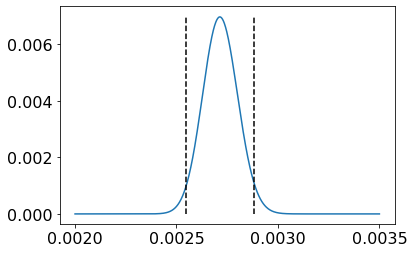

In [14]:
plt.plot(lambs,postdist)
plt.vlines([lambs[central_cred[0]],lambs[central_cred[-1]]], 0, 0.007, colors='k', linestyles='dashed')

In [15]:
np.sum(postdist[central_cred])

0.9506079369364073

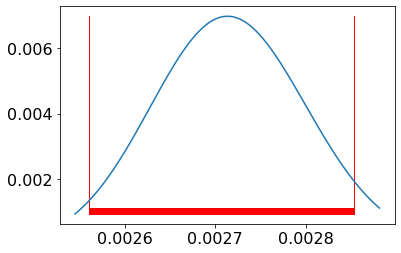

In [16]:
plt.plot(lambs[central_cred],postdist[central_cred])
plt.fill_betweenx(postdist[central_cred],lambs[central_cred[10]],lambs[central_cred[-20]],color='r')

In [17]:
postdist[central_cred]

array([0.0009346 , 0.00096928, 0.00100489, 0.00104145, 0.00107896,
       0.00111744, 0.0011569 , 0.00119733, 0.00123874, 0.00128115,
       0.00132456, 0.00136896, 0.00141437, 0.00146078, 0.0015082 ,
       0.00155663, 0.00160606, 0.00165649, 0.00170793, 0.00176037,
       0.0018138 , 0.00186821, 0.00192361, 0.00197998, 0.0020373 ,
       0.00209559, 0.00215481, 0.00221495, 0.00227601, 0.00233796,
       0.0024008 , 0.00246449, 0.00252903, 0.00259439, 0.00266054,
       0.00272748, 0.00279516, 0.00286356, 0.00293267, 0.00300244,
       0.00307285, 0.00314387, 0.00321547, 0.0032876 , 0.00336025,
       0.00343336, 0.00350691, 0.00358085, 0.00365515, 0.00372977,
       0.00380465, 0.00387977, 0.00395507, 0.00403052, 0.00410606,
       0.00418165, 0.00425725, 0.0043328 , 0.00440826, 0.00448357,
       0.00455869, 0.00463356, 0.00470814, 0.00478237, 0.0048562 ,
       0.00492957, 0.00500245, 0.00507476, 0.00514647, 0.00521751,
       0.00528783, 0.00535739, 0.00542612, 0.00549397, 0.00556

**Exercise 4.4**

In [18]:
from scipy.stats import norm, binom

ps = np.linspace(0,1,10001)
x = 11
n = 12

def posterior(x, n, p):
    prior = norm.pdf(p,0,1)
    likelihood = binom.pmf(x, n, p)
    return likelihood*prior

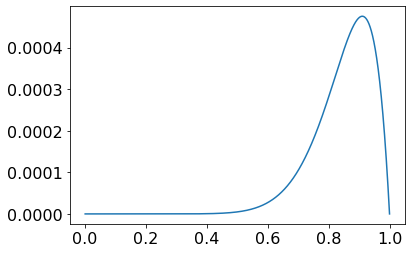

In [19]:
postdist = posterior(x, n, ps)/np.sum(posterior(x, n, ps))
plt.plot(ps,postdist)

In [20]:
def central_credible(dist, alpha):
    n = len(dist)
    
    leftlim = 0
    rightlim = n-1
    
    # find a
    while np.sum(postdist[:leftlim]) < alpha/2:
        leftlim += 1
    
    # find b
    while np.sum(postdist[leftlim:rightlim]) > (1-alpha):
        rightlim -= 1
    
    return [leftlim, rightlim]

In [21]:
[a1, b1] = central_credible(postdist, 0.05)

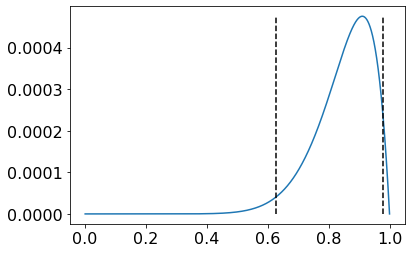

In [22]:
plt.plot(ps,postdist)
plt.vlines([ps[a1],ps[b1]], 0, postdist.max(), colors='k', linestyles='dashed')

In [23]:
print([ps[a1],ps[b1+1]])

[6.277e-01, 0.9796]


In [24]:
np.sum(postdist[:a1])

0.025033050110358213

In [25]:
def hdi_credible(dist, xs, alpha):
    idx = np.argsort(postdist)[::-1]
    mass_cum = 0
    indices = []
    
    for i in idx:
        mass_cum += dist[i]
        indices.append(i)
        if mass_cum >= (1 - alpha):
            break
    
    return [np.array(indices).min(), np.array(indices).max()]

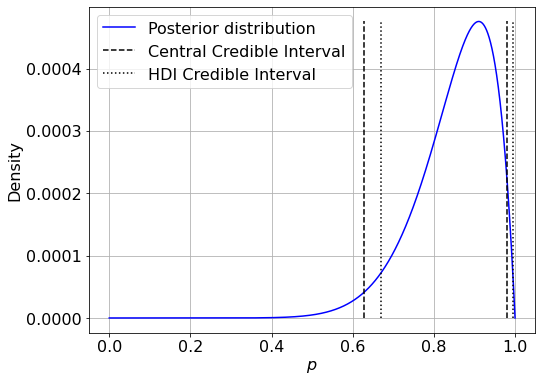

In [26]:
[a2, b2] = hdi_credible(postdist, ps, 0.05)

fig = plt.figure(figsize=(8,6))
plt.plot(ps,postdist,'b',label='Posterior distribution')
plt.vlines([ps[a1],ps[b1]], 0, postdist.max(), colors='k', linestyles='dashed', label='Central Credible Interval')
plt.vlines([ps[a2],ps[b2]], 0, postdist.max(), colors='k', linestyles='dotted', label='HDI Credible Interval')
plt.legend(loc='best')
plt.xlabel('$p$')
plt.ylabel('Density')
plt.grid()

**Exercise 4.5**

In [27]:
# generating 20 flips of a biased coin (probability of head = 0.7)
def biased_coin(N, p):
    nheads = 0

    for i in range(N):
        r = np.random.rand()
        if r < p:
            nheads += 1

    return nheads

In [28]:
N = 20
p = 0.7

n = biased_coin(N, p)
n

10

In [29]:
from scipy.stats import uniform

def posterior(n, N, p, prior_dist):

    if prior_dist == 1:
        prior = uniform.pdf(p, 0, 1)
    
    elif prior_dist == 2:
        prior = p*(1-p)
        
    else:
        raise Exception('prior_dist argument can only be 1 or 2')
    
    likelihood = binom.pmf(n, N, p)
    
    return likelihood*prior

In [30]:
ps = np.linspace(0,1,10001)

post1 = posterior(n, N, ps, prior_dist=1)
post2 = posterior(n, N, ps, prior_dist=2)

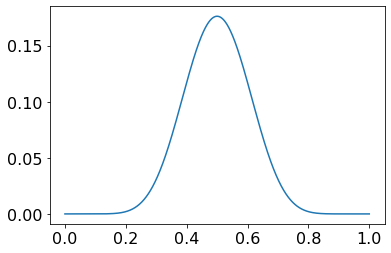

In [31]:
plt.plot(ps,post1)

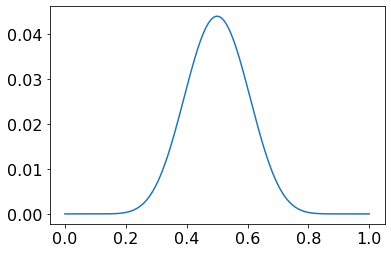

In [32]:
plt.plot(ps,post2)

**Exercise 4.6**

In [33]:
N = 50
p = 0.7

h = biased_coin(N, p)
t = N - h
print(h)
print(t)

37
13


In [34]:
from scipy.stats import beta

alpha = 2
bet = 2

In [35]:
def prior(alpha, bet, h, t, p):
    return beta.pdf(p, a=(alpha+h), b=(bet+t))

def posterior(alpha, bet, h, t, p, N):
    return binom.pmf(h, N, p)*prior(alpha, bet, h, t, p)

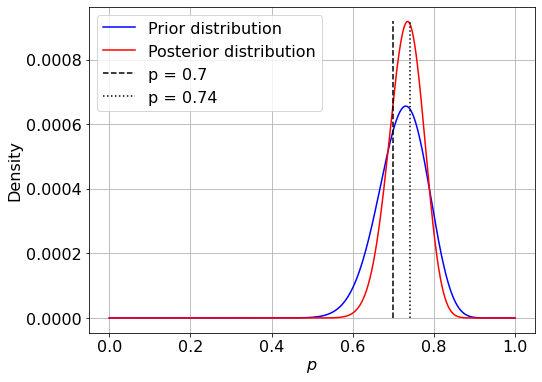

In [36]:
priordist = prior(alpha, bet, h, t, ps)/np.sum(prior(alpha, bet, h, t, ps))
postdist = posterior(alpha, bet, h, t, ps, N)/np.sum(posterior(alpha, bet, h, t, ps, N))

fig = plt.figure(figsize=(8,6))
plt.plot(ps,priordist,'b',label='Prior distribution')
plt.plot(ps,postdist,'r',label='Posterior distribution')
plt.vlines(p, 0, postdist.max(),color='k', linestyle='dashed', label='p = 0.7')
plt.vlines(h/N, 0, postdist.max(),color='k', linestyle='dotted', label='p = 0.74')
plt.legend(loc='best')
plt.xlabel('$p$')
plt.ylabel('Density')
plt.grid()

In [37]:
[a1, b1] = central_credible(postdist, 0.05)
[a2, b2] = hdi_credible(postdist, ps, 0.05)

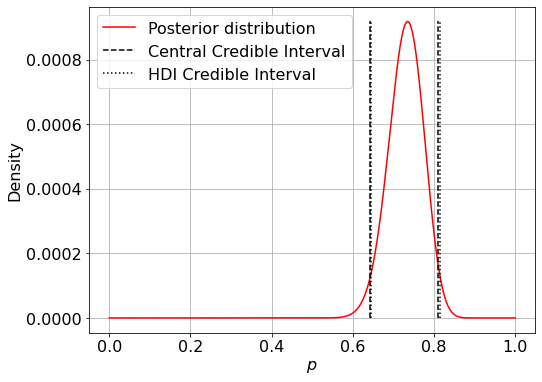

In [38]:
fig = plt.figure(figsize=(8,6))
plt.plot(ps,postdist,'r',label='Posterior distribution')
plt.vlines([ps[a1],ps[b1]], 0, postdist.max(), colors='k', linestyles='dashed', label='Central Credible Interval')
plt.vlines([ps[a2],ps[b2]], 0, postdist.max(), colors='k', linestyles='dotted', label='HDI Credible Interval')
plt.legend(loc='best')
plt.xlabel('$p$')
plt.ylabel('Density')
plt.grid()